In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()

In [7]:
aapl = pd.read_csv('../datasets/Dukascopy/AAPL.USUSD_Ticks_04.03.2024-04.03.2024.csv')

In [42]:
lvmh = pd.read_csv('../datasets/Dukascopy/MC.FREUR_Ticks_05.03.2024-05.03.2024.csv')

In [45]:
lvmh['AskVolume'].value_counts()

AskVolume
880    14850
330      232
800       91
Name: count, dtype: int64

In [62]:
# convert time to EST
aapl['Local time'] = pd.to_datetime(aapl['Local time'])
aapl['time'] = aapl['Local time'].dt.tz_convert('EST').dt.tz_localize(None)
aapl['hour'] = aapl['time'].dt.hour

In [65]:
aapl.groupby('hour').apply(lambda x: x['time'].diff().dt.total_seconds().mean())

hour
9     0.237741
10    0.395310
11    0.507645
12    0.779582
13    0.736800
14    0.689399
15    0.524369
dtype: float64

In [60]:
lvmh.groupby('hour').apply(lambda x: x['timestamp'].diff().dt.total_seconds().mean())

hour
9     1.418165
10    1.602623
11    3.158157
12    2.529323
13    2.806692
14    2.235597
15    1.807996
16    1.594007
17    2.477884
dtype: float64

In [72]:
pip install dill

   ---------------------------------------- 0.0/116.3 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/116.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 116.3/116.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='hour'>

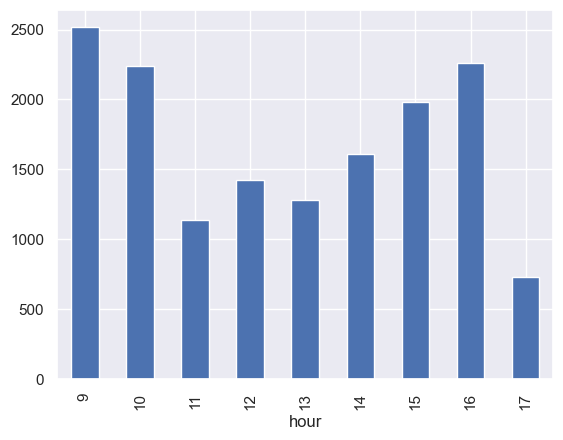

In [69]:
lvmh.groupby('hour').size().plot(kind='bar')